# Simulate Qiskit circuits with quimb

This tutorial shows how to simulate Qiskit circuits with quimb.

First, build a Qiskit circuit to use as an example.

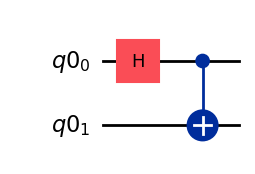

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister

# Build a Qiskit circuit
qubits = QuantumRegister(2)
circuit = QuantumCircuit(qubits)
a, b = qubits
circuit.h(a)
circuit.cx(a, b)

circuit.draw("mpl")

Convert the Qiskit circuit (an instance of `qiskit.circuit.QuantumCircuit`) to a quimb circuit (an instance of `quimb.tensor.Circuit`):

In [2]:
from qiskit_quimb import quimb_circuit

# Convert it to a quimb circuit
quimb_circ = quimb_circuit(circuit)

/home/runner/work/qiskit-quimb/qiskit-quimb/.tox/docs/lib/python3.13/site-packages/cotengra/hyperoptimizers/hyper.py:54: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(
/home/runner/work/qiskit-quimb/qiskit-quimb/.tox/docs/lib/python3.13/site-packages/cotengra/hyperoptimizers/hyper.py:73: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(


Now that you have a quimb object, you have the full power of quimb at your disposal. For example, you can sample bitstrings from the circuit:

In [3]:
# Sample 10 bitstrings
samples = list(quimb_circ.sample(10, seed=1234))

samples

['11', '00', '11', '00', '00', '00', '00', '00', '11', '00']

You can customize the `quimb.tensor.Circuit` subclass to use, as well as specify keyword arguments to its constructor. For example, the following code cell uses quimb's quantum circuit MPS implementation, setting a maximum bond dimension:

In [4]:
import quimb.tensor

# You can specify the quimb Circuit subclass and keyword arguments for the constructor
quimb_circ = quimb_circuit(
    circuit, quimb_circuit_class=quimb.tensor.CircuitMPS, max_bond=20
)
samples = list(quimb_circ.sample(10, seed=1234))

samples

['11', '11', '00', '00', '11', '00', '11', '11', '11', '00']

qiskit-quimb does not support every possible Qiskit gate, and in order to work with qiskit-quimb your Qiskit circuit must contain only supported gates. Notably, measurement gates are not supported. You can get the list of supported gates via `SUPPORTED_GATES`:

In [5]:
from qiskit_quimb import SUPPORTED_GATES

list(SUPPORTED_GATES)

['barrier',
 'ccx',
 'ccz',
 'cp',
 'cx',
 'cy',
 'cz',
 'h',
 'id',
 'iswap',
 'measure',
 'p',
 'rx',
 'rxx',
 'ry',
 'ryy',
 'rz',
 'rzz',
 's',
 'sdg',
 'sx',
 'sxdg',
 'swap',
 't',
 'tdg',
 'u1',
 'u2',
 'u3',
 'x',
 'xx_minus_yy',
 'xx_plus_yy',
 'y',
 'z']